# Chapter5 Error Backpropagation Method

## 5.2 Chain rule 連鎖律

y = f(x) で表される順伝播に対して、逆伝播を求めるとき
output側の値をEとしたとき逆伝搬の結果はyに対するxの偏微分となる。

$$
    E \frac{\partial y}{\partial x}
$$

## 5.3 Back Propagation
### 5.3.1 Addition Node

足し算　z=x+y： 偏微分はx,yいずれも1になるため、outputの値をそのまま伝搬する

$$
    \frac{\partial z}{\partial x} = 1 \\\
    \frac{\partial L}{\partial z} *1
$$

### 5.3.1 Multiplication Node

乗算　z=xy: x,yにおける偏微分はそれぞれ、y,xになる

## 5.4 Implementing a Simple Layer

![img](./figures/fig5_4.drawio.svg)


In [1]:
### 5.4.1 Multiplication Layer
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) # 220

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax) # 2.2 110 200

220.00000000000003
2.2 110.00000000000001 200


### 5.4.2 Addition Layer

In [ ]:
# 5.4.2 Addition Layer
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# Layer

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print("[Total Price]: ", price) # 715
print("[d(apple num)]", dapple_num, "[d(apple)]", dapple, "[d(orange)]", dorange,"[d (orange num)]", dorange_num, "[tax] ", dtax) # 110 2.2 3.3 165 650


[Total Price]:  715.0000000000001
[d(apple num)] 110.00000000000001 [d(apple)] 2.2 [d(orange)] 3.3000000000000003 [d (orange num)] 165.0 [tax]  650


## 5.5 Implementation of activation function layer

### 5.5.1 ReLU(Rectified Linear Unit) Layer
ReLU関数は以下で示される
$$
    f(x) = \left\{
    \begin{array}{ll}
        x & (x \gt 0) \\
        0 & (x \leq 0)
    \end{array}
    \right. \tag{5.7}
$$
この微分は以下で表される

$$
    \frac{\partial y}{\partial x} = 
        \left\{
        \begin{array}{ll}
            1 & (x \gt 0) \\
            0 & (x \leq 0)
        \end{array}
        \right. \tag{5.8}
$$

![image](./figures/fig5_5.drawio.svg)




In [3]:
# 5.5.1 ReLU(Rectified Linear Unit) Layer

class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [5]:
# try to use mask
import numpy as np

x= np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### 5.3.2 Sigmoid Layer
Sigmoid関数は

$$
    y = \frac{1}{1+\exp{(-x)}} 
$$


#### Step 1　"/" Node
$$
    y = \frac{1}{x}\\
    \frac{\partial y}{\partial y} = - \frac{1}{x^2} = -y^2
$$


#### Step2 + Node
+ ノードはそのまま右からの値を流すだけ


#### Step3 exp Node

$$
    y = \exp(x) \\
    \frac{\partial y}{\partial x} = \exp(x)
$$


#### Step4 x Node
x Nodeは二つのinをひっくり返す。　この場合-1をかける。

上のStepをまとめて、Sigmoidノードとして考えることができる。

$$
    \begin{align}
        \frac{\partial L}{\partial y} y^2 \exp(-x) &= \frac{\partial L}{\partial y} \frac{1}{(1 + exp(-x))^2} exp(-x) \\
        &= \frac{\partial L}{\partial y} \frac{1}{1 + exp(-x)} \frac{exp(-x)} {1+exp(-x)} \\
        &= \frac{\partial L}{\partial y} y (1-y)
    \end{align}
$$

In [ ]:
# 5.3.2 Sigmoid Layer
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx



## 5.6 Implimenting Affine / Softmax　Layer

### 5.6.1 Affine Layer
実際にニューラルネットワークで使っていた計算は行列の積
Y = X・W ＋B


$$
    \frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \cdot {W^T} \\
$$
$$
    \frac{\partial L}{\partial \mathbf{W}} = \mathbf{X}^T \cdot \frac{\partial L}{\partial \mathbf{Y}}
$$

$\frac{\partial L}{\partial \mathbf{W}}$ の計算は、算出される行列の次元を合わせるように転置・順序を決める。Wの偏微分が(２、3)


## 5.6.2 Batched Affine Layer

バッチに対応した場合、バイアスは(N,3)のそれぞれに適用される。

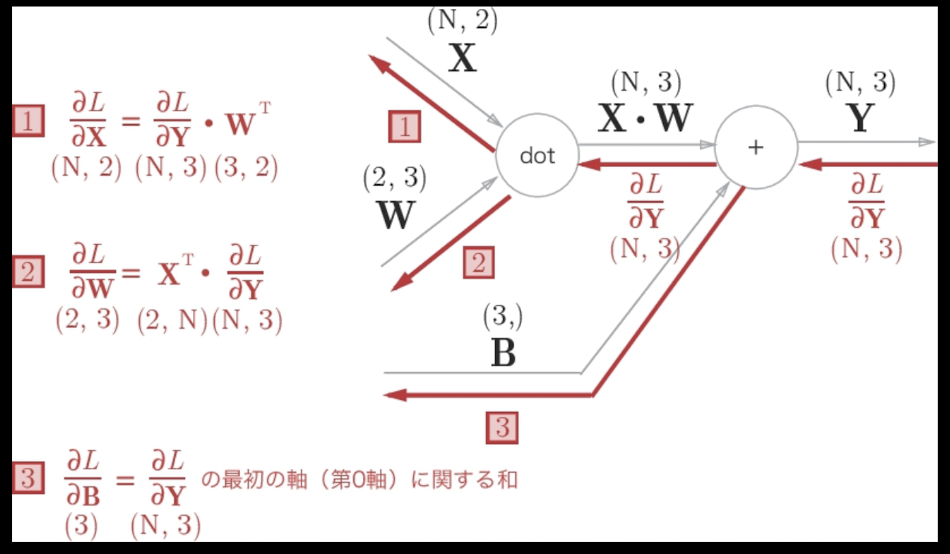

In [8]:
# example of bias value for 2d array
x_dot_w = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

print("X Dot W: ", x_dot_w)
print("X Dot W + B: ", x_dot_w + B)

# in Back propagation, we need to add bias into one dimention
dY = np.array([[1, 2, 3], [4, 5, 6]])
dB = np.sum(dY, axis=0)
print("dY: ", dY)
print("dB: ", dB)


X Dot W:  [[ 0  0  0]
 [10 10 10]]
X Dot W + B:  [[ 1  2  3]
 [11 12 13]]
dY:  [[1 2 3]
 [4 5 6]]
dB:  [5 7 9]


In [ ]:
# Class of Affine layer
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        #self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        #self.original_x_shape = x.shape
        #x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

### 5.6.3 Softmax-with-Loss Layer

Softmaxは出力層の結果を正規化するために用いる。
出力の総和を1とした確率に変換する。
分類ではなく、推論の場合には通常Softmaxレイヤは必要ないが、学習の時に用いる。

softmax with loss レイヤでは損失関数も含めて実装する。

### Appendix A: Forward Propagation
Softmax function is
$$
    y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)}
$$


Cross Entropy Error function is
$$
    L = - \sum_{k} t_k \log{y_k}
$$

![img](./figures/fig.drawio.svg)

### Appendix B: Back Propagation
Backpropagation of Cross Entropy Error is performed through the  following steps.

- back propagation of the sum of each $$ t_k \log{y_k}$$ is involves passing the value of the partial derivative of L with respect to y directly
- For the back propagation fo the multiplication node for $$t_k \log{y_k}$$, the value on the y side is multiplied by $$-t_k$$
- The backpropagation of the log node becoms 1/y

$$
    \frac{\partial L}{\partial y} = (- \frac{t_1}{y_1})
$$

#### Step1 : Sigmoid Layer (multiplication of exp(a) and 1/S)

$$
    - \frac{t_1}{y_1} \exp(a_1) = -t_1 \frac{S}{\exp(a_1)} exp(a_1) = -t_1 S
$$

#### Step2 : Sum of S
y = 1/x dy/dx = -1/x^2
純伝搬の際に複数に枝分かれしていた場合、逆伝搬では逆伝搬の値が加算され、加算された値に対して”/”ノードの逆伝搬を行う。
つまり、
$$
    (-t_1 S) + (-t_2 S) + (-t_3 S) = -S (t_1+t_2+t_3)\\
    \frac{\partial L}{\partial y} = - \frac{1}{S^2}\\
$$
上下の式を掛けて、$$\frac{1}{S}(t_1+t_2+t_3)$$

#### Step3: multiplication node (exp(a1)side)

$$
    - \frac{t_k}{y_k} * \frac{1}{S} = -\frac{t_k*S}{\exp(a_n)}* \frac{1}{S} = -\frac{t_n}{\exp(a_n)}
$$

#### Step4 : exp node

Backpropagation of exp node is done after add two layer's input 1/S and -t/exp(a). Partial derivation of exp(x) = exp(x).

$$
    \exp(a_k) * (\frac{1}{S} - \frac{t_k}{\exp(a_k)}) = \frac{\exp(a_k)}{S} - t_k = y_k - t_k
$$


In [ ]:
# class of softmax with loss layer

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 損失
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx

## 5.7 Implementation of error backpropagation

### 5.7.2 Implementation of a neural network with error backpropagation



In [9]:
# implementation of a neural network with error backpropagation

import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.param['W1'] = weight_init_std * \
                        np.random.randn(input_size, hidden_size)
        self.param['b1'] = np.zeros(hidden_size)
        self.param['W2'] = weight_init_std * \
                        np.random.randn(hidden_size, output_size)
        self.param['b2'] = np.zeros(output_size)

        # layer creation
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
            Affine(self.param['W1'], self.param['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.param['W2'], self.param['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads


In [28]:
# 5.7.3　gradient check for backpropagation error
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 各重みの絶対誤差の平均を求める
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))



W1:4.945725878390897e-10
b1:2.1592808113659723e-09
W2:5.802293688666386e-09
b2:1.4054335189389588e-07


In [27]:
print(grad_numerical.keys())

# find max value in grad_umerical['W1'] and show number of max value
print(np.max(grad_numerical['W1']))

num = np.max(grad_numerical['W1'])
print(np.where(grad_numerical['W1'] == num))
print(grad_backprop['W1'][np.where(grad_numerical['W1'] == num)])


dict_keys(['W1', 'b1', 'W2', 'b2'])
0.010954752067693363
(array([466]), array([49]))
[0.01095476]


In [29]:
# 5.7.4 Training using error backpropagation

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 誤差逆伝播法によって勾配を求める
    grad = network.gradient(x_batch, t_batch)

    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.14798333333333333 0.1571
0.90345 0.9073
0.9175166666666666 0.9186
0.93105 0.932
0.9413 0.9397
0.94945 0.9463
0.9545 0.9527
0.9606666666666667 0.9572
0.9654666666666667 0.9608
0.96735 0.9615
0.9697166666666667 0.9645
0.9723166666666667 0.9659
0.9743833333333334 0.9676
0.9754833333333334 0.9671
0.9758833333333333 0.9697
0.97795 0.9685
0.9795166666666667 0.9695


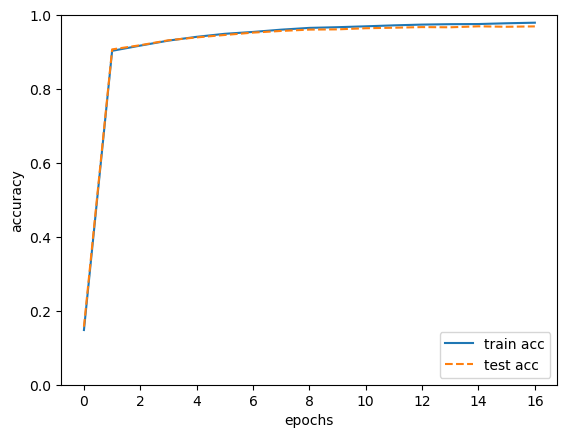

In [30]:
# show graph of loss and accuracy
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [34]:
batch_mask

array([32420,  2489, 25439,  3316, 13234, 14283, 28497, 31895, 59929,
        7580, 15869, 10125, 10337, 12203, 22576, 55983, 16939, 38840,
       55096, 45580, 58659,  8446,  7346,  3148, 17048, 18420,   294,
       44593, 50533, 49133, 46840, 20631, 15972, 52457, 11929, 11321,
        2636, 42257,  3004, 57860, 30509, 52117, 20248, 52614, 29558,
       32377, 13040, 17182, 57051, 36970, 21621, 38010, 56217, 32871,
       48888,  3666, 55166, 51873, 44328, 46577, 24592, 28135, 15079,
       21894, 41881, 16834, 27742, 49315, 12316, 21781, 50469, 25461,
        8535, 23320,  6044, 10069, 21834, 39033, 50173, 40936, 15304,
       18551, 16307, 34200, 34513, 24732, 25420, 21536, 39106, 25382,
       49609, 13090,   463, 32509, 18125, 56677,  6373,  6256, 57346,
       56069])